# Analyze frequency

In [1]:
import sounddevice as sd
import numpy as np
import wave
import time

import librosa
import matplotlib.pyplot as plt

In [18]:
def analyze_frequency(audio_data, n_frames, frame_rate=22050):
    fft_result = np.fft.fft(audio_data)
    fft_magnitude = np.abs(fft_result) / n_frames
    frequencies = np.fft.fftfreq(n_frames, 1 / frame_rate)
    
    # プロットの準備（正の周波数成分のみ表示）
    half_length = len(fft_magnitude) // 2
    frequencies = frequencies[:half_length]
    fft_magnitude = fft_magnitude[:half_length]
    return frequencies, fft_magnitude

def plot_frequency(frequencies, fft_magnitude):
    # 周波数スペクトルをプロット
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, fft_magnitude)
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.xlim(0, 2500)  # Nyquist frequency まで表示
    plt.show()

def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_sftf = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_sftf, n_mels=128)
    return melsp

def show_wave(x):
    plt.plot(x)
    plt.show()

def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [28]:
sd.play(_audio_data_2, fs)

In [32]:
duration = 3
fs = 22050
sd.default.device = [1, 10]
data = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()

_audio_data_1 = data.reshape(len(data))

In [33]:
duration = 3
fs = 22050
sd.default.device = [1, 10]
data = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()

_audio_data_2 = data.reshape(len(data))

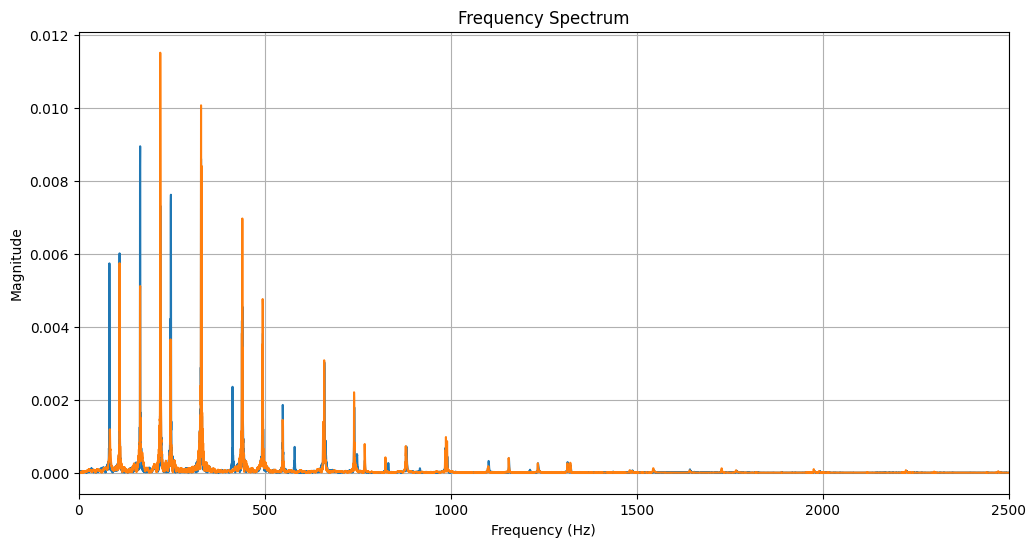

In [34]:
frec_1, fft_1 = analyze_frequency(_audio_data_1, duration*fs, fs)
frec_2, fft_2 = analyze_frequency(_audio_data_2, duration*fs, fs)

# 周波数スペクトルをプロット
plt.figure(figsize=(12, 6))
plt.plot(frec_1, fft_1)
plt.plot(frec_2, fft_2)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 2500)  # Nyquist frequency まで表示
plt.show()

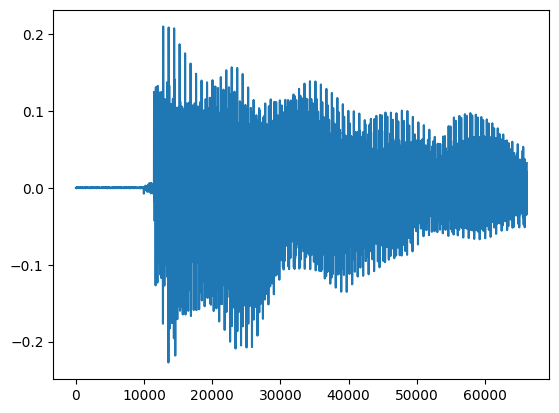

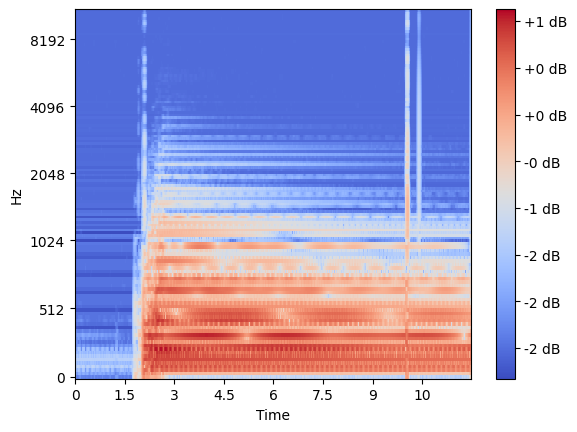

In [35]:
melsp = calculate_melsp(_audio_data_1)
show_wave(_audio_data_1)
show_melsp(melsp, fs)

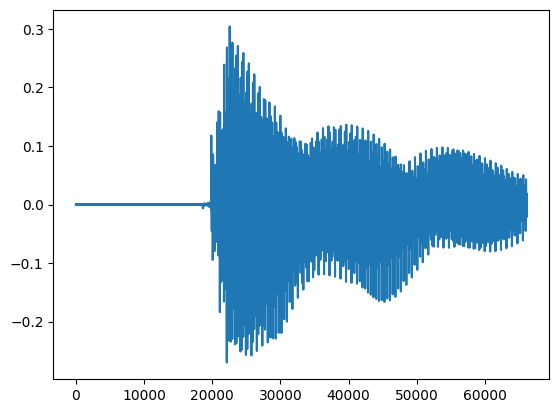

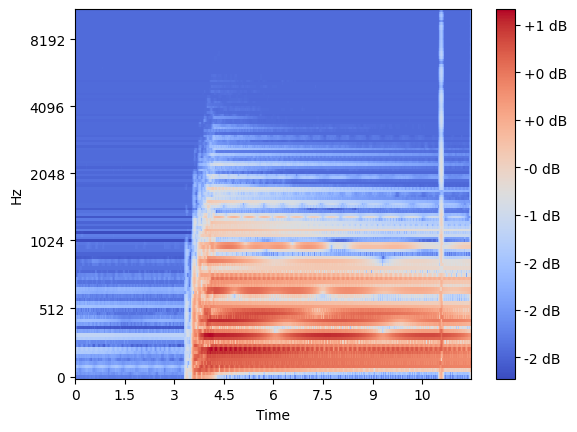

In [36]:
melsp = calculate_melsp(_audio_data_2)
show_wave(_audio_data_2)
show_melsp(melsp, fs)